In [45]:
import pickle
import os

def print_pickle_data(data_dir, filename):
    """
    指定されたpickleファイルの内容を表示します。

    Args:
        data_dir (str): データディレクトリのパス
        filename (str): pickleファイル名
    """
    pickle_file = os.path.join(data_dir, 'pickle_data', filename)
    
    try:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
        
        # データの内容を表示
        print(data[126])

    except FileNotFoundError:
        print(f"Error: Pickle file not found - {pickle_file}")
    except Exception as e:
        print(f"Error reading pickle file: {e}")

if __name__ == "__main__":
    data_dir = r"C:\Users\r-fujita\Desktop\ET"
    filename = 'FCC_E-2602C.pickle'  # 確認したいpickleファイル名
    print_pickle_data(data_dir, filename)

{'folder_name': 'FCC_E-2602C', 'filename': '007-002.xlsx', 'waveform_data': array([[-3266,  1207, -2547, ...,   538, -6552,  7589],
       [-3268,  1212, -2547, ...,   536, -6551,  7589],
       [-3271,  1218, -2550, ...,   533, -6550,  7590],
       ...,
       [-3292,  1293, -2576, ...,   581, -6554,  7570],
       [-3291,  1297, -2577, ...,   581, -6554,  7569],
       [-3290,  1299, -2577, ...,   581, -6553,  7568]], dtype=int64), 'labels': array([1]), 'label_positions': array([19745], dtype=int64)}


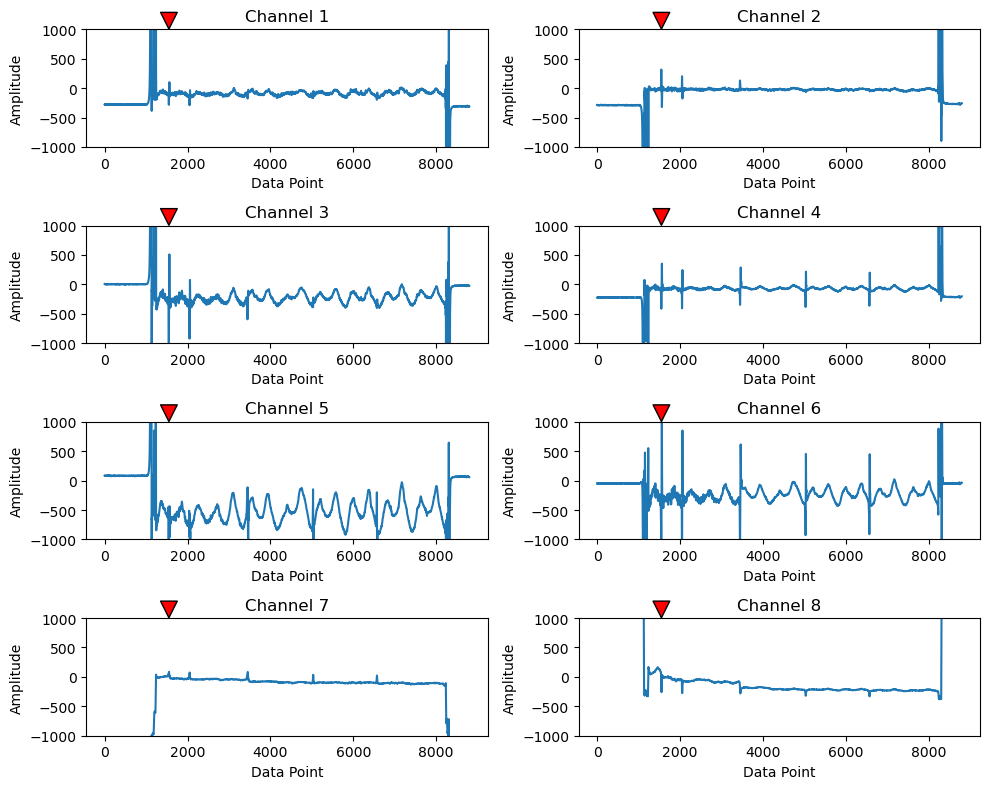

In [19]:
def plot_waveform_data(data_dir, filename, target_filename):
    """
    指定されたpickleファイルから、指定されたファイル名の波形データをサブプロットでプロットします。
    縦軸のフルスケールは-1000～1000です。
    labelが1の場合にlabel_positionの位置に赤い矢印を付けます。

    Args:
        data_dir (str): データディレクトリのパス
        filename (str): pickleファイル名
        target_filename (str): プロットする波形データのファイル名
    """
    pickle_file = os.path.join(data_dir, 'pickle_data', filename)

    try:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)

        # 指定されたファイル名の波形データとラベル位置を探す
        for item in data:
            if item['filename'] == target_filename:
                waveform_data = item['waveform_data']
                label_positions = item['label_positions']//2
                labels = item['labels']
                break
        else:
            raise ValueError(f"Target filename not found: {target_filename}")

        # 波形データをサブプロットでプロット
        fig, axs = plt.subplots(4, 2, figsize=(10, 8))  # 4x2のサブプロットを作成
        for i in range(8):
            row = i // 2
            col = i % 2
            axs[row, col].plot(waveform_data[:, i])
            axs[row, col].set_title(f"Channel {i+1}")
            axs[row, col].set_xlabel("Data Point")
            axs[row, col].set_ylabel("Amplitude")
            axs[row, col].set_ylim(-1000, 1000)  # 縦軸のフルスケールを-1000～1000に設定

            # labelが1の場合にlabel_positionの位置に赤い矢印を付ける
            if labels[0] == 1:  # labelsは全て同じ値なので、最初の要素で判定
                for pos in label_positions:
                    axs[row, col].annotate('', xy=(pos, 1000), xytext=(pos, 1100),
                                          arrowprops=dict(facecolor='red', shrink=0.05))

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: Pickle file not found - {pickle_file}")
    except ValueError as e:
        print(e)
    except Exception as e:
        print(f"Error reading pickle file: {e}")

if __name__ == "__main__":
    data_dir = r"C:\Users\r-fujita\Desktop\ET"
    filename = 'FCC_E-2316B.pickle'
    target_filename = '001-001.xlsx'  # プロットしたいファイル名を指定
    plot_waveform_data(data_dir, filename, target_filename)

In [9]:
import os
import pickle
import pandas as pd

def extract_data_to_excel(data_dir, filename):
    """
    pickleファイルからfilenameキーとlabel_positionキーを全て取り出し、Excelに出力します。

    Args:
        data_dir (str): データディレクトリのパス
        filename (str): pickleファイル名
    """
    pickle_file = os.path.join(data_dir, filename)

    try:
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)

        # filenameとlabel_positionを格納するリスト
        extracted_data = []
        for item in data:
            # デバッグ: item['filename'] の値を確認
            print(f"item['filename']: {item['filename']}, type: {type(item['filename'])}")  

            # デバッグ: item['filename'] と item['label_positions'] の要素数を確認
            print(f"len(item['filename']): {len(item['filename'])}, len(item['label_positions']): {len(item['label_positions'])}")  

            # 修正: zip 関数を使わずに filename と label_position を対応付ける
            for i in range(len(item['label_positions'])):  
                extracted_data.append([item['filename'], item['label_positions'][i]])

        # デバッグ: extracted_data の内容を確認
        print("extracted_data:", extracted_data)

        # DataFrameに変換
        df = pd.DataFrame(extracted_data, columns=['filename', 'label_position'])

        # デバッグ: DataFrame の内容を確認
        print("DataFrame:", df)

        # Excelに出力
        excel_file = os.path.join(data_dir, f"{filename[:-7]}_extracted.xlsx")
        df.to_excel(excel_file, index=False)
        print(f"{excel_file} に書き出しました。")

    except FileNotFoundError:
        print(f"Error: Pickle file not found - {pickle_file}")
    except Exception as e:
        print(f"Error reading pickle file: {e}")


if __name__ == "__main__":
    data_dir = r"C:\Users\r-fujita\Desktop\ET\藤澤さんデータ\リスト1課\pickle_data"  # 必要に応じてパスを修正してください
    filename = 'UE-210B.pickle'
    extract_data_to_excel(data_dir, filename)

item['filename']: 001-001.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 1
item['filename']: 001-002.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 1
item['filename']: 001-003.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 3
item['filename']: 001-004.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 3
item['filename']: 001-005.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 3
item['filename']: 001-006.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 1
item['filename']: 002-001.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 1
item['filename']: 002-002.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 1
item['filename']: 002-003.xlsx, type: <class 'str'>
len(item['filename']): 12, len(item['label_positions']): 1
i